# Binary Trees
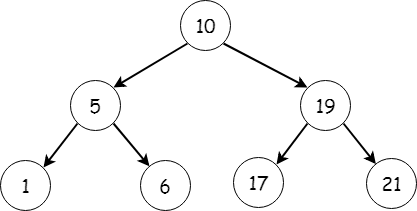

## Properties:
- a tree data structure where each node has at most two children
- each node has a left and right child, one or both of which can be null
- many variations of binary trees:
    - binary search tree
    - AVL tree
    - red black tree
- many problems can be solved very efficiently using variations of a binary tree

## Types of Binary Trees:
- full: each node has 0 or two children
- perfect: all non-leaf nodes have two children, all leaf nodes located at same level
- complete: all levels except for last level are completely full, nodes in last level are children of the leftmost parent node
- balanced: all leaf nodes are the same distance from the root
    - all leaf nodes have same depth which is same as height of tree



## Types of Binary Tree Traversals:
- Depth First Search:
    - preorder traversal
        - visit root node, left subtree, right subtree
    - inorder traversal
        - visit left subtree, root node, right subtree
    - postorder traversal
        - visit left subtree, right subtree, root node
- breadth first search:
    - level order traversal
        - traverse tree level by level
        - begin at root and visit each subsequent level until you reach leaves

## Linked List Implementation
- tree node objects have three components
    - data
    - left
    - right
- each node of the tree is a new subtree
- can traverse the tree recursively

In [30]:
from collections import deque

In [201]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self, root=None):
        self.root = root
        self.size = 0
        self.values = []
        
    def preorder_traversal(self):
        self.values = []
        self.preorder_traversal_r(self.root)
        return self.values
    
    def preorder_traversal_r(self, top):
        if not top:
            return
        self.values.append(top.data)
        self.preorder_traversal_r(top.left)
        self.preorder_traversal_r(top.right)
        
    def inorder_traversal(self):
        self.values = []
        self.inorder_traversal_r(self.root)
        return self.values
    
    def inorder_traversal_r(self, top):
        if not top:
            return
        self.inorder_traversal_r(top.left)
        self.values.append(top.data)
        self.inorder_traversal_r(top.right)
    
    def postorder_traversal(self):
        self.values = []
        self.postorder_traversal_r(self.root)
        return self.values
    
    def postorder_traversal_r(self, top):
        if not top:
            return
        self.postorder_traversal_r(top.left)
        self.preorder_traversal_r(top.right)
        self.values.append(top.data)
    
    def levelorder_traversal(self):
        self.values = []
        if not self.root:
            return self.values
        else:
            q = deque()
            q.appendleft(self.root)
            while len(q) > 0:
                curr = q.pop()
                self.values.append(curr.data)
                if curr.left is not None:
                    q.appendleft(curr.left)
                if curr.right is not None:
                    q.appendleft(curr.right)
        return self.values
    
    def search(self, value):
        if not self.root:
            return False
        else:
            q = deque()
            q.appendleft(self.root)
            while len(q) > 0:
                curr = q.pop()
                if curr.data == value:
                    return True
                if curr.left is not None:
                    q.appendleft(curr.left)
                if curr.right is not None:
                    q.appendleft(curr.right)
        return False
    
    def get_node(self, value):
        if not self.root:
            return None
        else:
            q = deque()
            q.appendleft(self.root)
            while len(q) > 0:
                curr = q.pop()
                if curr.data == value:
                    return curr
                if curr.left is not None:
                    q.appendleft(curr.left)
                if curr.right is not None:
                    q.appendleft(curr.right)
        return None
    
    def insert(self, value): # level order traversal, adds new node to first open spot
        if not self.root:
            self.root = TreeNode(value)
            return True
        else:
            q = deque()
            q.appendleft(self.root)
            while len(q) > 0:
                curr = q.pop()
                if curr.left == None:
                    curr.left = TreeNode(value)
                    return True
                elif curr.right == None:
                    curr.right = TreeNode(value)
                    return True
                else:
                    q.appendleft(curr.left)
                    q.appendleft(curr.right)
    
    def get_deepest_node(self):
        if not self.root:
            return None
        else:
            q = deque()
            q.appendleft(self.root)
            while len(q) > 0:
                curr = q.pop()
                if curr.left is not None:
                    q.appendleft(curr.left)
                if curr.right is not None:
                    q.appendleft(curr.right)
            return curr                  
    
    def delete(self, value): # finds node to delete and finds deepest nodes. swaps values. deletes deepest node
        if not self.root:
            return False
        else:
            q = deque()
            q.appendleft(self.root)
            delete_node = self.get_node(value)
            deepest_node = self.get_deepest_node()
            curr = None
            while len(q) > 0:
                curr = q.pop()
                if curr.left is not None:
                    if curr.left is deepest_node:
                        curr.left = None
                        break
                    else:
                        q.appendleft(curr.left)
                if curr.right is not None:
                    if curr.right is deepest_node:
                        curr.right = None
                        break
                    else:
                        q.appendleft(curr.right)
                        
            if delete_node is None:
                print('err')
            delete_node.data = deepest_node.data
    
    def delete_binary_tree(self):
        self.root.left = None
        self.root.right = None
        self.root = None
            
        
            
        
        
        
        
        
        

In [252]:
a = BinaryTree()
print(a.levelorder_traversal())
a.insert(1)
a.insert(2)
a.insert(3)
a.insert(4)
a.insert(5)
a.insert(6)
a.insert(7)
print(a.levelorder_traversal())
a.delete(4)
print(a.levelorder_traversal())
a.delete_binary_tree()
print(a.levelorder_traversal())


[]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 7, 5, 6]
[]


## Array Implementation (Finite Size)
- entire tree is represented by an array
- index of left child with index x is 2x
- index of right child with index x is (2x + 1)
    - index 0 is empty
    - root at index 1
    - left child at index 2, right child at index 3
    - repeats for each child node

In [253]:
class Binary_Tree:
    def __init__(self, size):
        self.max_size = size
        self.list = self.max_size * [None]
        self.last_used_index = 0
        self.values = []
    
    def insert(self, value):
        if self.last_used_index + 1 == self.max_size:
            return False
        self.list[self.last_used_index + 1] = value
        self.last_used_index += 1
        return True
    
    def search(self, value):
        for i in self.list:
            if i == value:
                return True
        return False
    
    def preorder_traversal(self):
        self.values = []
        self.preorder_traversal_r(1)
        return self.values
    
    def preorder_traversal_r(self, index):
        if index > self.last_used_index:
            return
        self.values.append(self.list[index])
        self.preorder_traversal_r(index*2)
        self.preorder_traversal_r(index*2 + 1)
    
    def inorder_traversal(self):
        self.values = []
        self.inorder_traversal_r(1)
        return self.values
    
    def inorder_traversal_r(self, index):
        if index > self.last_used_index:
            return
        self.inorder_traversal_r(index*2)
        self.values.append(self.list[index])
        self.inorder_traversal_r(index*2 + 1)
    
    def postorder_traversal(self):
        self.values = []
        self.postorder_traversal_r(1)
        return self.values
    
    def postorder_traversal_r(self, index):
        if index > self.last_used_index:
            return
        self.postorder_traversal_r(index*2)
        self.postorder_traversal_r(index*2 + 1)
        self.values.append(self.list[index])
    
    def levelorder_traversal(self):
        self.values = []
        for i in self.list:
            if i is not None:
                self.values.append(i)
        return self.values
    
    def delete(self, value):
        if self.last_used_index == 0:
            return False
        for i in range(1, self.last_used_index+1):
            if self.list[i] == value:
                self.list[i] = self.list[self.last_used_index]
                self.list[self.last_used_index] = None
                self.last_used_index -= 1
                return True
    
    def delete_tree(self):
        self.list = self.max_size * [None]
        

In [255]:
a = Binary_Tree(10)
print(a.levelorder_traversal())
a.insert(1)
a.insert(10)
a.insert(100)
a.insert(1000)
print(a.levelorder_traversal())
a.delete(10)
print(a.levelorder_traversal())
a.delete_tree()
print(a.levelorder_traversal())
    

[]
[1, 10, 100, 1000]
[1, 1000, 100]
[]


## Time and Space Complexity of Binary Tree Implementations
- binary tree with array implementation is space inefficient because you must allocate memory for all possible nodes, even when they are not all used. For. linked list implementation, memory is allocated as you insert more nodes

- insert, delete, search, traverse can be completed with constant space complexity in array implementation, since the full array is allocated upon creation of the BT. With the linked list implementation, these operations require creating a queue and enqueing all elements

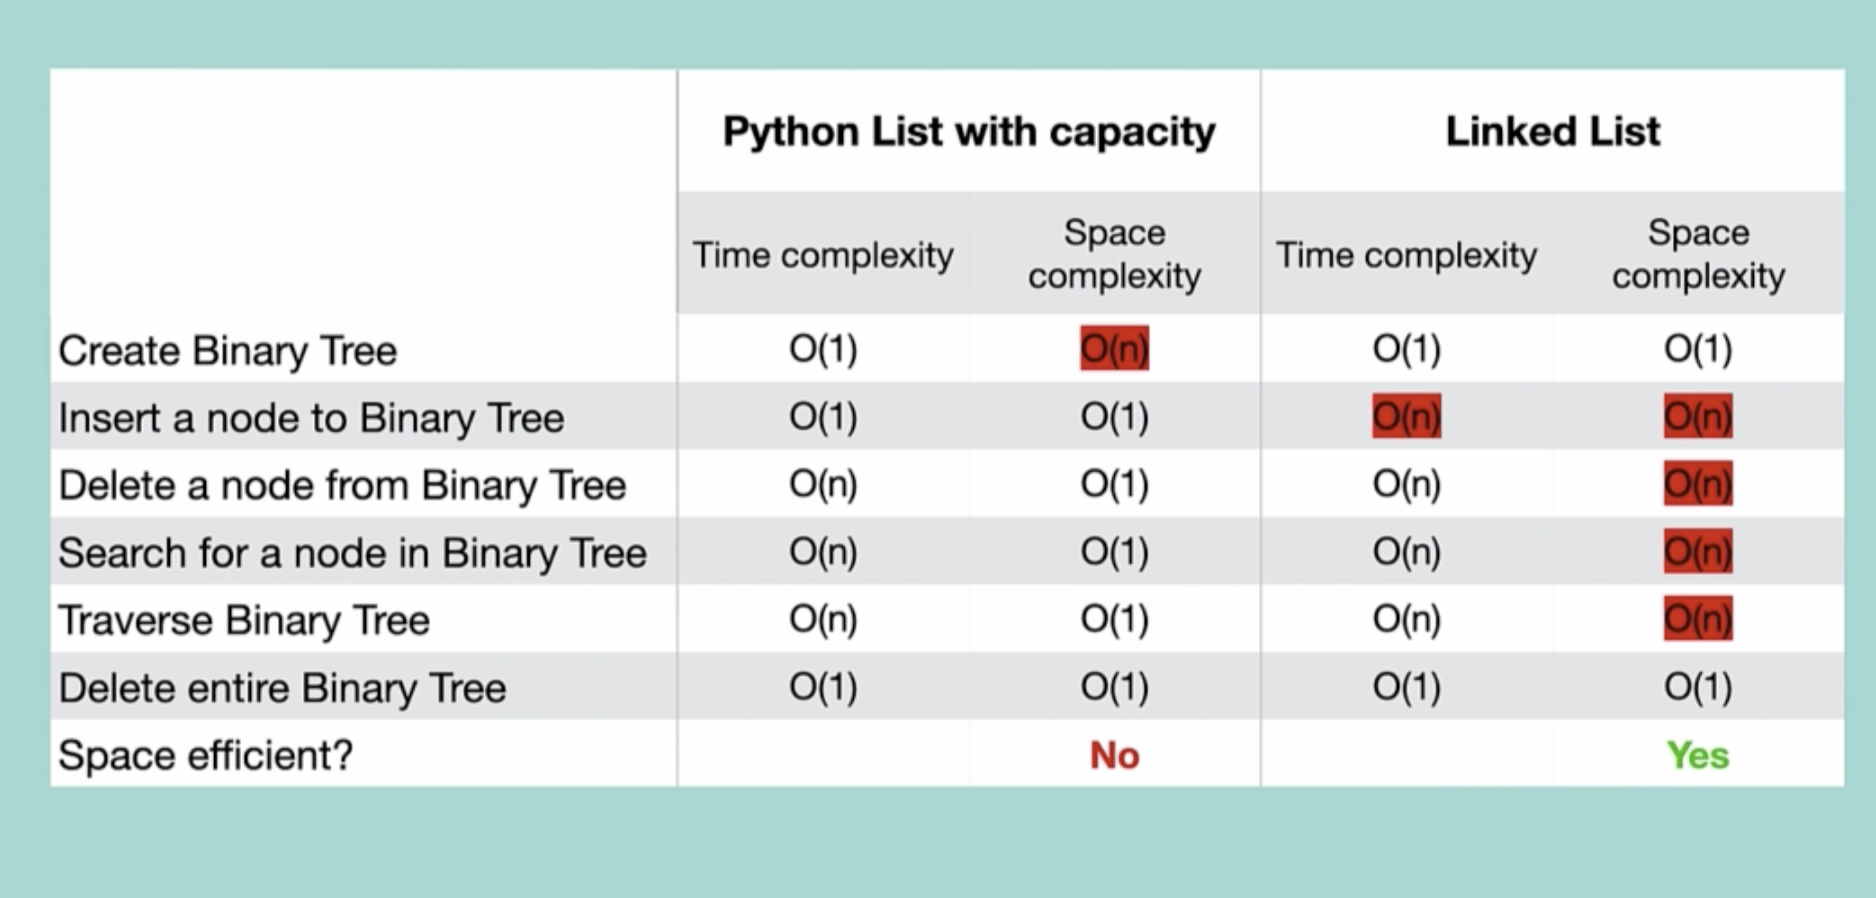